In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_WIDTH=1280
IMG_HEIGHT=768

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_images = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3), name='image')

# ----- Feature Extractor -----
conv1 = layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_normal')(input_images)
conv1 = layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_normal')(conv1)
f1 = conv1
pool1 = layers.MaxPool2D(pool_size=(2, 2))(conv1)

conv2 = layers.Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='he_normal')(pool1)
conv2 = layers.Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='he_normal')(conv2)
f2 = conv2
pool2 = layers.MaxPool2D(pool_size=(2, 2))(conv2)

conv3 = layers.Conv2D(256, 3, padding='same', activation='relu', kernel_initializer='he_normal')(pool2)
conv3 = layers.Conv2D(256, 3, padding='same', activation='relu', kernel_initializer='he_normal')(conv3)
f3 = conv3
pool3 = layers.MaxPool2D(pool_size=(2, 2))(conv3)

conv4 = layers.Conv2D(512, 3, padding='same', activation='relu', kernel_initializer='he_normal')(pool3)
conv4 = layers.Conv2D(512, 3, padding='same', activation='relu', kernel_initializer='he_normal')(conv4)
f4 = conv4
pool4 = layers.MaxPool2D(pool_size=(2, 2))(conv4)

conv5 = layers.Conv2D(512, 3, padding='same', activation='relu', kernel_initializer='he_normal')(pool4)
conv5 = layers.Conv2D(512, 3, padding='same', activation='relu', kernel_initializer='he_normal')(conv5)
f5 = conv5
pool5 = layers.MaxPool2D(pool_size=(2, 2))(conv5)

conv6 = layers.Conv2D(512, 3, padding='same', activation='relu', kernel_initializer='he_normal')(pool5)
conv6 = layers.Conv2D(512, 3, padding='same', activation='relu', kernel_initializer='he_normal')(conv6)
f6 = conv6

# ----- Upsample block -----
def upsample_block(x, skip, out_channels):
    x = layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(x)
    x = layers.Concatenate()([x, skip])
    x = layers.Conv2D(out_channels * 2, 1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(out_channels, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

# ----- Feature Fusion -----
x = upsample_block(f6, f5, 256)
x = upsample_block(x, f4, 128)
x = upsample_block(x, f3, 64)
x = upsample_block(x, f2, 32)
x = upsample_block(x, f1, 16)

# ----- Output Heads -----
region_output = layers.Conv2D(1, 1, activation='sigmoid', name='region_output')(x)
affinity_output = layers.Conv2D(1, 1, activation='sigmoid', name='affinity_output')(x)

text_detection_model = keras.Model(inputs=input_images, outputs=[region_output, affinity_output])
text_detection_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)  │ (None, 768, 1280, │          0 │ -                 │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 768, 1280, │      1,792 │ image[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 768, 1280, │     36,928 │ conv2d_22[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 384, 640,  │          0 │ conv2d_23[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 384, 640,  │     73,856 │ max_pooling2d_5[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 384, 640,  │    147,584 │ conv2d_24[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 192, 320,  │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 192, 320,  │    295,168 │ max_pooling2d_6[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 192, 320,  │    590,080 │ conv2d_26[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 96, 160,   │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 96, 160,   │  1,180,160 │ max_pooling2d_7[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 96, 160,   │  2,359,808 │ conv2d_28[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 48, 80,    │          0 │ conv2d_29[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 48, 80,    │  2,359,808 │ max_pooling2d_8[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 48, 80,    │  2,359,808 │ conv2d_30[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 24, 40,    │          0 │ conv2d_31[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 24, 40,    │  2,359,808 │ max_pooling2d_9[

 Total params: 16,488,818 (62.90 MB)

 Trainable params: 16,485,842 (62.89 MB)

 Non-trainable params: 2,976 (11.62 KB)

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_gaussian(mask, center, sigma=6):
    tmp_size = sigma * 3
    x = np.arange(0, 2 * tmp_size + 1, 1)
    y = x[:, np.newaxis]
    x0 = y0 = tmp_size
    g = np.exp(- ((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))

    x, y = int(center[0]), int(center[1])
    height, width = mask.shape
    left, right = max(0, x - tmp_size), min(width, x + tmp_size + 1)
    top, bottom = max(0, y - tmp_size), min(height, y + tmp_size + 1)

    g_x1, g_x2 = max(0, tmp_size - x), tmp_size + (right - x)
    g_y1, g_y2 = max(0, tmp_size - y), tmp_size + (bottom - y)

    mask[top:bottom, left:right] = np.maximum(mask[top:bottom, left:right], g[g_y1:g_y2, g_x1:g_x2])
    return mask

def make_char_affinity_maps(image, word_boxes):
    h, w = image.shape[:2]
    region_map = np.zeros((h, w), dtype=np.float32)
    affinity_map = np.zeros((h, w), dtype=np.float32)

    for box, text in word_boxes:
        x1, y1, x2, y2 = box
        num_chars = len(text.strip('"'))
        if num_chars == 0:
            continue

        # Estimate character boxes by evenly splitting the word box horizontally
        char_width = (x2 - x1) / num_chars
        char_boxes = []

        for i in range(num_chars):
            cx1 = int(x1 + i * char_width)
            cx2 = int(x1 + (i + 1) * char_width)
            cy1 = int(y1)
            cy2 = int(y2)
            char_center = ((cx1 + cx2) // 2, (cy1 + cy2) // 2)
            region_map = draw_gaussian(region_map, char_center)
            char_boxes.append(char_center)

        # Affinity map: draw Gaussian between centers of adjacent characters
        for i in range(len(char_boxes) - 1):
            mid_x = (char_boxes[i][0] + char_boxes[i + 1][0]) // 2
            mid_y = (char_boxes[i][1] + char_boxes[i + 1][1]) // 2
            affinity_map = draw_gaussian(affinity_map, (mid_x, mid_y))

    return region_map, affinity_map


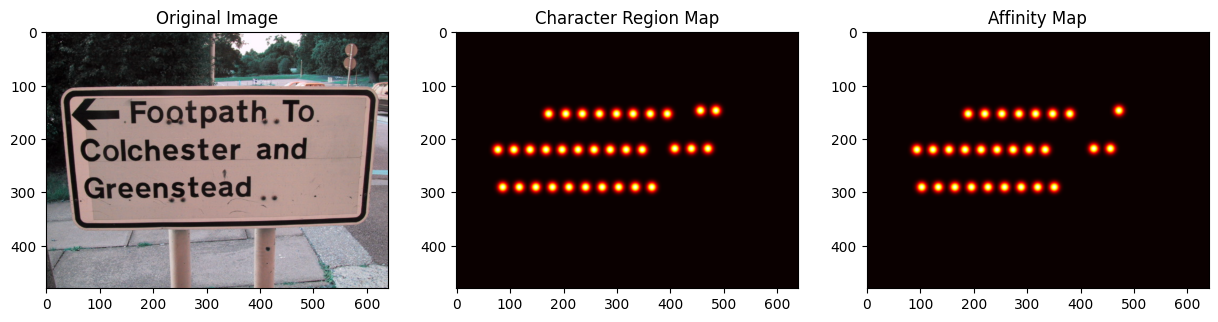

In [ ]:
# Load image
image_path = '/content/drive/My Drive/data/train/train_image/100.jpg'
gt_path = '/content/drive/My Drive/data/train/train_txt/gt_100.txt'

image = cv2.imread(image_path)


# Read GT boxes
def make_boxes(gt_path):
  word_boxes = []
  with open(gt_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        x1, y1, x2, y2, word = int(parts[0]), int(parts[1]), int(parts[2]), int(parts[3]), parts[4]
        word_boxes.append(((x1, y1, x2, y2), word))
  return word_boxes
word_boxes=make_boxes(gt_path)
region_map, affinity_map = make_char_affinity_maps(image, word_boxes)

# Visualize
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(region_map, cmap='hot')
plt.title('Character Region Map')
plt.subplot(1,3,3)
plt.imshow(affinity_map, cmap='hot')
plt.title('Affinity Map')
plt.show()


In [ ]:
heights=[]
widths=[]
path='/content/drive/My Drive/data/train/train_image'
for file in os.listdir(path):
    image_path=os.path.join(path,file)
    image=cv2.imread(image_path)
    height, width = image.shape[:2]
    heights.append(height)
    widths.append(width)
print(f"The mean of the height is: {np.mean(heights)} and the median is {np.median(heights)}")
print(f"The mean of the width is: {np.mean(widths)} and the median is {np.median(widths)}")

The mean of the height is: 915.0043668122271 and the median is 480.0
The mean of the width is: 1264.240174672489 and the median is 640.0


In [ ]:
def normalize_to_uint8(img):
    img = np.clip(img, 0, None)  # Remove negatives
    if np.max(img) > 0:
        img = img / np.max(img)
    img = (img * 255).astype(np.uint8)
    return img


In [ ]:
import os
import cv2

dir_affinity = r'data\train\affinity'
dir_character_score = r'data\train\character_score'
txt_dir = r'data\train\train_txt'
path = r'data\train\train_image'  # Make sure you define this!

# Ensure output directories exist
os.makedirs(dir_affinity, exist_ok=True)
os.makedirs(dir_character_score, exist_ok=True)

for file in os.listdir(path):
    image_path = os.path.join(path, file)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Warning: Failed to read {file}, skipping...")
        continue

    txt_file_name = "gt_" + os.path.splitext(file)[0] + ".txt"
    txt_path = os.path.join(txt_dir, txt_file_name)

    if not os.path.exists(txt_path):
        print(f"Warning: TXT file not found for {file}, skipping...")
        continue

    word_boxes = make_boxes(txt_path)  # Assuming this is defined elsewhere
    region_map, affinity_map = make_char_affinity_maps(image, word_boxes)  # Also defined elsewhere

    file_name_affinity = os.path.splitext(file)[0] + "_affinity.jpg"
    file_name_region = os.path.splitext(file)[0] + "_region.jpg"

    save_affinity_path = os.path.join(dir_affinity, file_name_affinity)
    save_region_path = os.path.join(dir_character_score, file_name_region)

    cv2.imwrite(save_affinity_path, normalize_to_uint8(affinity_map))
    cv2.imwrite(save_region_path, normalize_to_uint8(region_map))


    print(f"Saved: {file_name_affinity}, {file_name_region}")


In [ ]:
def load_image(image_path, region_path, affinity_path):
    # Load and preprocess image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    image = tf.cast(image, tf.float32) / 255.0

    # Region map
    region = tf.io.read_file(region_path)
    region = tf.image.decode_jpeg(region, channels=1)
    region = tf.image.resize(region, (IMG_HEIGHT, IMG_WIDTH))
    region = tf.cast(region, tf.float32) / 255.0

    # Affinity map
    affinity = tf.io.read_file(affinity_path)
    affinity = tf.image.decode_jpeg(affinity, channels=1)
    affinity = tf.image.resize(affinity, (IMG_HEIGHT, IMG_WIDTH))
    affinity = tf.cast(affinity, tf.float32) / 255.0

    # 🧠 Return labels as a dictionary with matching output names
    return image, {'region_output': region, 'affinity_output': affinity}


In [ ]:
import glob

image_paths = sorted(glob.glob('/content/drive/My Drive/data/train/train_image/*.jpg'))
region_paths = sorted(glob.glob('/content/drive/My Drive/data/train/character_score/*.jpg'))
affinity_paths = sorted(glob.glob('/content/drive/My Drive/data/train/affinity/*.jpg'))

dataset = tf.data.Dataset.from_tensor_slices((image_paths, region_paths, affinity_paths))
dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.shuffle(200).batch(1).prefetch(tf.data.AUTOTUNE)


In [ ]:
from tensorflow import keras

# Define the model (already compiled)
text_detection_model.compile(
    optimizer='adam',
    loss={
        "region_output": keras.losses.BinaryCrossentropy(),
        "affinity_output": keras.losses.BinaryCrossentropy()
    },
    metrics={
        "region_output": keras.metrics.MeanIoU(num_classes=2),
        "affinity_output": keras.metrics.MeanIoU(num_classes=2)
    }
)

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='loss',
    patience=3,
    restore_best_weights=True
)



In [ ]:
history = text_detection_model.fit(
    dataset,
    epochs=50,
    callbacks=[early_stopping]
)


Epoch 1/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 50s 209ms/step - affinity_output_loss: 0.0187 - affinity_output_mean_io_u_1: 0.5000 - loss: 0.0403 - region_output_loss: 0.0216 - region_output_mean_io_u: 0.5000
Epoch 2/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 50s 211ms/step - affinity_output_loss: 0.0205 - affinity_output_mean_io_u_1: 0.5000 - loss: 0.0441 - region_output_loss: 0.0236 - region_output_mean_io_u: 0.5000
Epoch 3/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 51s 212ms/step - affinity_output_loss: 0.0182 - affinity_output_mean_io_u_1: 0.5000 - loss: 0.0393 - region_output_loss: 0.0211 - region_output_mean_io_u: 0.5000
Epoch 4/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 50s 211ms/step - affinity_output_loss: 0.0197 - affinity_output_mean_io_u_1: 0.5000 - loss: 0.0427 - region_output_loss: 0.0230 - region_output_mean_io_u: 0.5000
Epoch 5/50
229/229 ━━━━━━━━━━━━━━━━━━━━ 50s 212ms/step - affinity_output_loss: 0.0201 - affinity_output_mean_io_u_1: 0.5000 - loss: 0.0436 - region_output_loss: 0.0235 - region_output_mean_io_

In [ ]:
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    image = tf.cast(image, tf.float32) / 255.0
    return tf.expand_dims(image, axis=0)  # Add batch dimension


In [ ]:
# Give the full path to a single image
test_image_path = '/content/drive/My Drive/data/train/train_image/106.jpg'

# Preprocess the image
input_image = preprocess_image(test_image_path)

# Predict using your OCR model
region_pred, affinity_pred = text_detection_model(input_image, training=False)

# Remove batch and channel dimensions for visualization
region_pred = region_pred[0, ..., 0]
affinity_pred = affinity_pred[0, ..., 0]


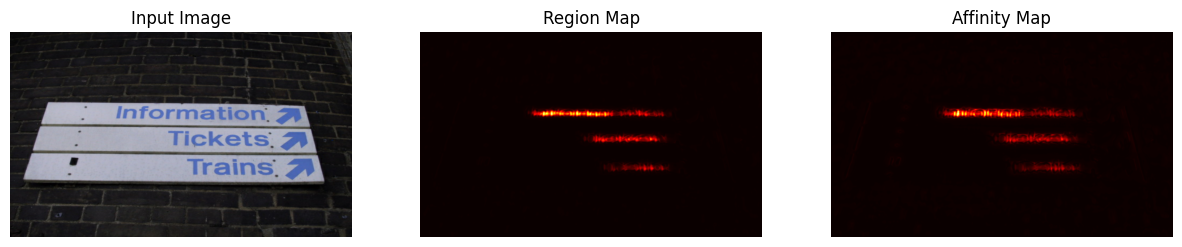

In [ ]:
import matplotlib.pyplot as plt

# Load image for visualization (resized)
original_image = tf.image.decode_jpeg(tf.io.read_file(test_image_path))
original_image = tf.image.resize(original_image, (IMG_HEIGHT, IMG_WIDTH))
original_image = tf.cast(original_image, tf.float32) / 255.0

# Plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(region_pred.numpy(), cmap='hot')
plt.title('Region Map')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(affinity_pred.numpy(), cmap='hot')
plt.title('Affinity Map')
plt.axis('off')

plt.show()


[[np.int32(697), np.int32(137), np.int32(701), np.int32(154)], [np.int32(748), np.int32(197), np.int32(752), np.int32(217)], [np.int32(406), np.int32(199), np.int32(741), np.int32(247)], [np.int32(521), np.int32(262), np.int32(866), np.int32(311)], [np.int32(427), np.int32(272), np.int32(435), np.int32(286)], [np.int32(273), np.int32(273), np.int32(451), np.int32(324)], [np.int32(455), np.int32(285), np.int32(462), np.int32(310)], [np.int32(415), np.int32(335), np.int32(700), np.int32(389)], [np.int32(706), np.int32(353), np.int32(710), np.int32(371)], [np.int32(860), np.int32(416), np.int32(864), np.int32(441)], [np.int32(575), np.int32(417), np.int32(852), np.int32(467)], [np.int32(281), np.int32(424), np.int32(515), np.int32(476)], [np.int32(511), np.int32(436), np.int32(525), np.int32(464)], [np.int32(817), np.int32(492), np.int32(834), np.int32(510)], [np.int32(651), np.int32(499), np.int32(803), np.int32(545)], [np.int32(803), np.int32(506), np.int32(811), np.int32(508)], [np.int

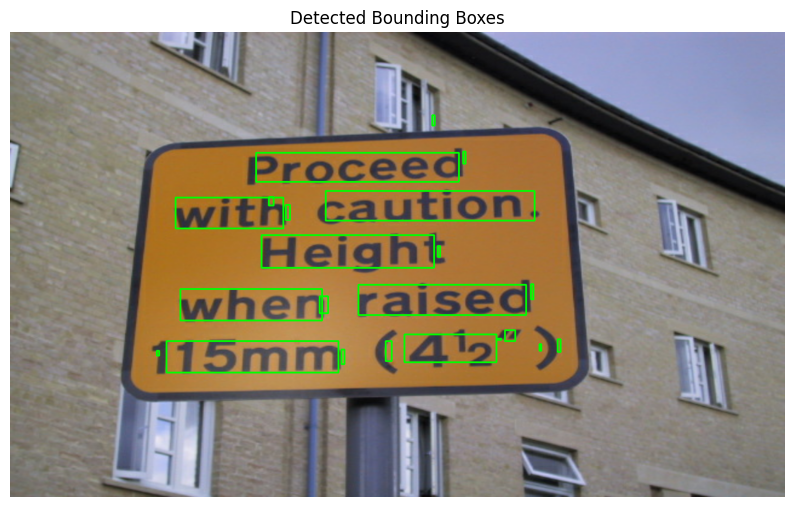

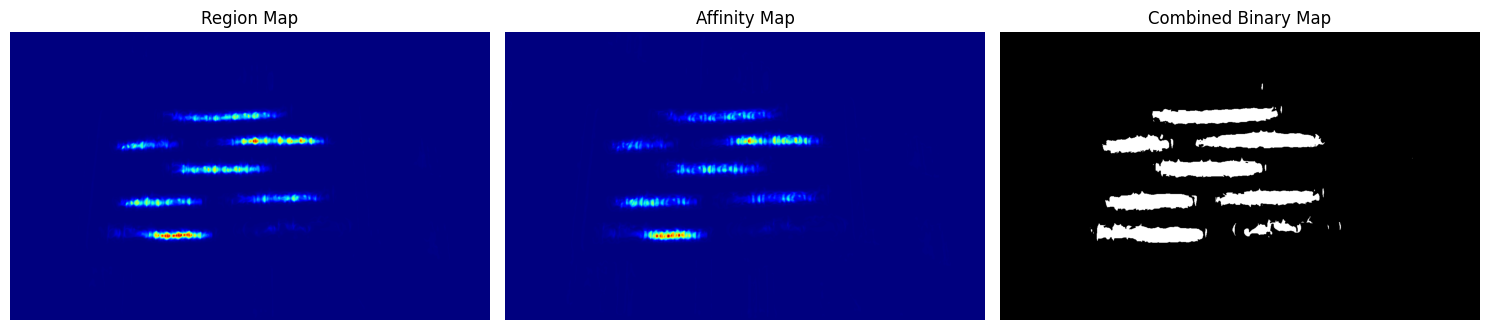

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# -------------------------------
# CONFIG
# -------------------------------

IMAGE_PATH = '/content/drive/My Drive/data/train/train_image/117.jpg'  # your test image

# -------------------------------
# 1. Preprocess Image
# -------------------------------
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    image = tf.cast(image, tf.float32) / 255.0
    return tf.expand_dims(image, axis=0), image  # return both batched and unbatched

input_image, original_image = preprocess_image(IMAGE_PATH)

# -------------------------------
# 2. Predict with Model
# -------------------------------
region_pred, affinity_pred = text_detection_model(input_image, training=False)
region_pred = region_pred[0, ..., 0].numpy()
affinity_pred = affinity_pred[0, ..., 0].numpy()

# -------------------------------
# 3. Threshold and Combine Maps
# -------------------------------
region_bin = (region_pred > 0.0003).astype(np.uint8)
affinity_bin = (affinity_pred > 0.0003).astype(np.uint8)
combined = np.clip(region_bin + affinity_bin, 0, 1).astype(np.uint8)

# -------------------------------
# 4. Connected Components
# -------------------------------
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(combined, connectivity=4)
bounding_boxes = []

for i in range(1, num_labels):  # Skip background
    x, y, w, h, area = stats[i]
    if area > 10:  # Filter small components
        bounding_boxes.append([x, y, x + w, y + h])
print(bounding_boxes)
# -------------------------------
# 5. Draw Bounding Boxes
# -------------------------------
image = (original_image.numpy() * 255).astype(np.uint8)

for box in bounding_boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# -------------------------------
# 6. Plot Final Result
# -------------------------------
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Detected Bounding Boxes')
plt.axis('off')
plt.show()

# -------------------------------
# 7. Optional: Visualize Raw Maps
# -------------------------------
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.imshow(region_pred, cmap='jet')
plt.title('Region Map')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(affinity_pred, cmap='jet')
plt.title('Affinity Map')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(combined, cmap='gray')
plt.title('Combined Binary Map')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio
import os

# -------------------------------
# CONFIG
# -------------------------------
IMAGE_PATH = '/content/drive/My Drive/data/train/train_image/100.jpg'
GIF_PATH = 'gift.gif'

# -------------------------------
# 1. Preprocess Image
# -------------------------------
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    image = tf.cast(image, tf.float32) / 255.0
    return tf.expand_dims(image, axis=0), image

input_image, original_image = preprocess_image(IMAGE_PATH)

# -------------------------------
# 2. Predict Maps
# -------------------------------
region_pred, affinity_pred = text_detection_model(input_image, training=False)
region_pred = region_pred[0, ..., 0].numpy()
affinity_pred = affinity_pred[0, ..., 0].numpy()

# -------------------------------
# 3. Threshold and Combine
# -------------------------------
region_bin = (region_pred > 0.0003).astype(np.uint8)
affinity_bin = (affinity_pred > 0.0003).astype(np.uint8)
combined = np.clip(region_bin + affinity_bin, 0, 1).astype(np.uint8)

# -------------------------------
# 4. Connected Components + Bounding Boxes
# -------------------------------
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(combined, connectivity=4)
bounding_boxes = []
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if area > 10:
        bounding_boxes.append([x, y, x + w, y + h])

# -------------------------------
# 5. Prepare Image Frames for GIF
# -------------------------------
frames = []

def add_frame(fig):
    fig.canvas.draw()
    rgba = np.array(fig.canvas.buffer_rgba())
    frames.append(rgba)
    plt.close(fig)

# Frame 1: Input Image
img1 = (original_image.numpy() * 255).astype(np.uint8)
fig, ax = plt.subplots()
ax.imshow(img1)
ax.set_title('Original Image')
ax.axis('off')
add_frame(fig)

# Frame 2: Affinity Map
fig, ax = plt.subplots()
ax.imshow(affinity_pred, cmap='hot')
ax.set_title('Affinity Map')
ax.axis('off')
add_frame(fig)

# Frame 3: Region Map
fig, ax = plt.subplots()
ax.imshow(region_pred, cmap='hot')
ax.set_title('Region Map')
ax.axis('off')
add_frame(fig)

# Frame 4: Final Bounding Box Image
img_box = img1.copy()
for box in bounding_boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(img_box, (x1, y1), (x2, y2), (0, 255, 0), 2)

fig, ax = plt.subplots()
ax.imshow(img_box)
ax.set_title('Detected Text Boxes')
ax.axis('off')
add_frame(fig)

# -------------------------------
# 6. Save GIF
# -------------------------------
imageio.mimsave(GIF_PATH, frames, duration=500)

print(f"✅ GIF saved at: {GIF_PATH}")


✅ GIF saved at: gift.gif


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imageio
import os

# -------------------------------
# CONFIG
# -------------------------------
  # Resize dims
DURATION = 500  # Seconds per frame
GIF_PATH = 'final_output.gif'

# -------------------------------
# Helper Function to Generate Frames for One Image
# -------------------------------
def generate_frames(image_path, model):
    input_image, original_image = preprocess_image(image_path)

    region_pred, affinity_pred = model(input_image, training=False)
    region_pred = region_pred[0, ..., 0].numpy()
    affinity_pred = affinity_pred[0, ..., 0].numpy()

    region_bin = (region_pred > 0.0003).astype(np.uint8)
    affinity_bin = (affinity_pred > 0.0003).astype(np.uint8)
    combined = np.clip(region_bin + affinity_bin, 0, 1).astype(np.uint8)

    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(combined, connectivity=4)
    bounding_boxes = []
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > 10:
            bounding_boxes.append([x, y, x + w, y + h])

    frames = []

    def add_frame(img, title='', cmap=None):
        fig, ax = plt.subplots()
        ax.imshow(img, cmap=cmap)
        ax.set_title(title)
        ax.axis('off')
        fig.canvas.draw()
        frame = np.array(fig.canvas.buffer_rgba())
        frames.append(frame)
        plt.close(fig)

    img1 = (original_image.numpy() * 255).astype(np.uint8)
    img_box = img1.copy()
    for box in bounding_boxes:
        x1, y1, x2, y2 = box
        cv2.rectangle(img_box, (x1, y1), (x2, y2), (0, 255, 0), 2)

    add_frame(img1, 'Original Image')
    add_frame(affinity_pred, 'Affinity Map', cmap='hot')
    add_frame(region_pred, 'Region Map', cmap='hot')
    add_frame(img_box, 'Detected Text Boxes')

    return frames

# -------------------------------
# Preprocessing Function
# -------------------------------
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (IMG_HEIGHT, IMG_WIDTH))
    image = tf.cast(image, tf.float32) / 255.0
    return tf.expand_dims(image, axis=0), image

# -------------------------------
# MAIN: Combine Multiple GIFs
# -------------------------------

# Replace with your image paths
image1_path = '/content/drive/My Drive/data/train/train_image/100.jpg'
image2_path = '/content/drive/My Drive/data/train/train_image/106.jpg'
image3_path='/content/drive/My Drive/data/train/train_image/117.jpg'
# Use your model here
frames1 = generate_frames(image1_path, text_detection_model)
frames2 = generate_frames(image2_path, text_detection_model)
frames3=generate_frames(image3_path,text_detection_model)
# Combine both
final_frames = frames1 + frames2+frames3

# Save as GIF
imageio.mimsave(GIF_PATH, final_frames, duration=DURATION)
print(f"✅ Combined GIF saved at: {GIF_PATH}")


✅ Combined GIF saved at: final_output.gif


In [ ]:
text_detection_model.save('text_detection_model.h5')

from google.colab import files
files.download('text_detection_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>